# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removing Warnings 

In [2]:
import warnings
warnings.simplefilter("ignore")

# Reading and Exploring the Data

In [3]:
df=pd.read_csv("mymoviedb.csv",lineterminator='\n')

In [4]:
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [5]:
df.sample(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1873,2015-09-02,The Transporter Refueled,The fast-paced action movie is again set in th...,42.664,1243,5.5,en,"Action, Thriller, Crime",https://image.tmdb.org/t/p/original/71kaQfdrMy...
7316,2004-09-27,El padrino: The Latin Godfather,"In the streets of East Los Angeles, Manny is a...",16.198,21,6.1,en,"Action, Crime, Drama",https://image.tmdb.org/t/p/original/10J7EQ8WvM...
1248,2000-03-31,The Road to El Dorado,"After a failed swindle, two con-men end up wit...",57.012,3073,7.2,en,"Family, Adventure, Animation, Comedy, Action",https://image.tmdb.org/t/p/original/ip5MgTU8qp...
6646,2021-03-26,An Optical Illusion - Interval,"A couple from Burgos, Alfredo and Teresa, trav...",17.269,24,4.8,es,Thriller,https://image.tmdb.org/t/p/original/sRNN7QnHDy...
3517,1997-08-15,Event Horizon,"In 2047, a group of astronauts are sent to inv...",26.838,2041,6.5,en,"Horror, Science Fiction, Mystery",https://image.tmdb.org/t/p/original/qfluaDXv0c...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [8]:
df.shape

(9827, 9)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [11]:
df.describe(include='object')

,Release_Date,Title,Overview,Original_Language,Genre,Poster_Url
count,9827,9827,9827,9827,9827,9827
unique,5893,9513,9822,43,2337,9827
top,2022-03-10,Beauty and the Beast,Wilbur the pig is scared of the end of the sea...,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,7570,466,1


English films is the most type 


Dramatic Films is the most frequently

# Unnecessary Columns:

### Overview, Poster_Url, can be dropped to simplify the dataset.

In [12]:
df.drop(columns=['Overview','Poster_Url'],inplace=True)

In [13]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


# "Release_Date" Column

In [14]:
df['Release_Date'].value_counts()

Release_Date
2022-03-10    16
2022-03-09    15
2021-10-08    13
2021-02-12    13
2021-07-23    11
              ..
2009-11-16     1
1932-04-09     1
2007-11-05     1
2012-11-25     1
1984-09-23     1
Name: count, Length: 5893, dtype: int64

In [15]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# Extracting the year and creating a new column Year_of_Release
df['Year_of_Release'] = df['Release_Date'].dt.year

In [16]:
df['Year_of_Release'].value_counts()[:40]

Year_of_Release
2021    714
2018    530
2017    510
2019    500
2016    470
2020    453
2015    390
2014    371
2013    348
2011    316
2009    291
2012    285
2010    279
2008    250
2007    245
2006    237
2005    216
2022    208
2004    205
2003    182
2002    165
2001    164
2000    138
1998    130
1999    125
1993    118
1997    117
1995    113
1994    103
1996     96
1992     89
1991     83
1988     82
1985     80
1989     80
1990     76
1987     73
1986     68
1984     57
1983     52
Name: count, dtype: int64

 The most years in which films have been produced are [2021, 2018, 2017, .....]

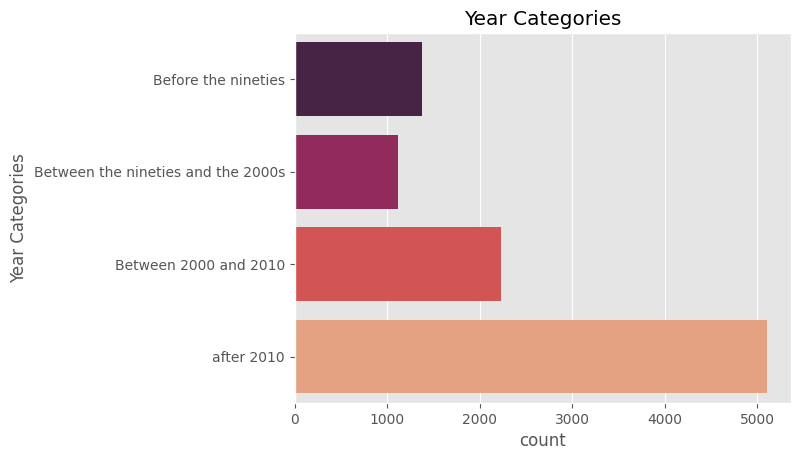

In [17]:
# convert it to Categorical

bin_edges = [0,1990,2000,2010,df["Year_of_Release"].max()]
bin_labels = ['Before the nineties', 'Between the nineties and the 2000s', 'Between 2000 and 2010', 'after 2010']

df['Year_cat'] = pd.cut(df['Year_of_Release'], bins=bin_edges, labels=bin_labels)
sns.countplot(data=df , y='Year_cat',palette="rocket")
plt.ylabel("Year Categories")
plt.title("Year Categories")

plt.show()

In [18]:
df.drop(columns=['Release_Date'],inplace=True)

# "Title" Column With "Popularity" Column

In [19]:
df['Title'].value_counts()

Title
Beauty and the Beast                      4
Alice in Wonderland                       4
The Little Mermaid                        3
The Call                                  3
Halloween                                 3
                                         ..
There's Something About Mary              1
Amores Perros                             1
The Human Centipede 3 (Final Sequence)    1
Newness                                   1
Threads                                   1
Name: count, Length: 9513, dtype: int64

In [20]:
df1 = df.groupby(['Title'])[[ 'Popularity']].mean()
df1=df1.sort_values(by = 'Popularity', ascending = False)
df1

,Popularity
Title,
Spider-Man: No Way Home,5083.954
The Batman,3827.658
No Exit,2618.087
Encanto,2402.201
The King's Man,1895.511
...,...
Badlands,13.357
Violent Delights,13.356
The Offering,13.355


Text(0.5, 0, 'movies title')

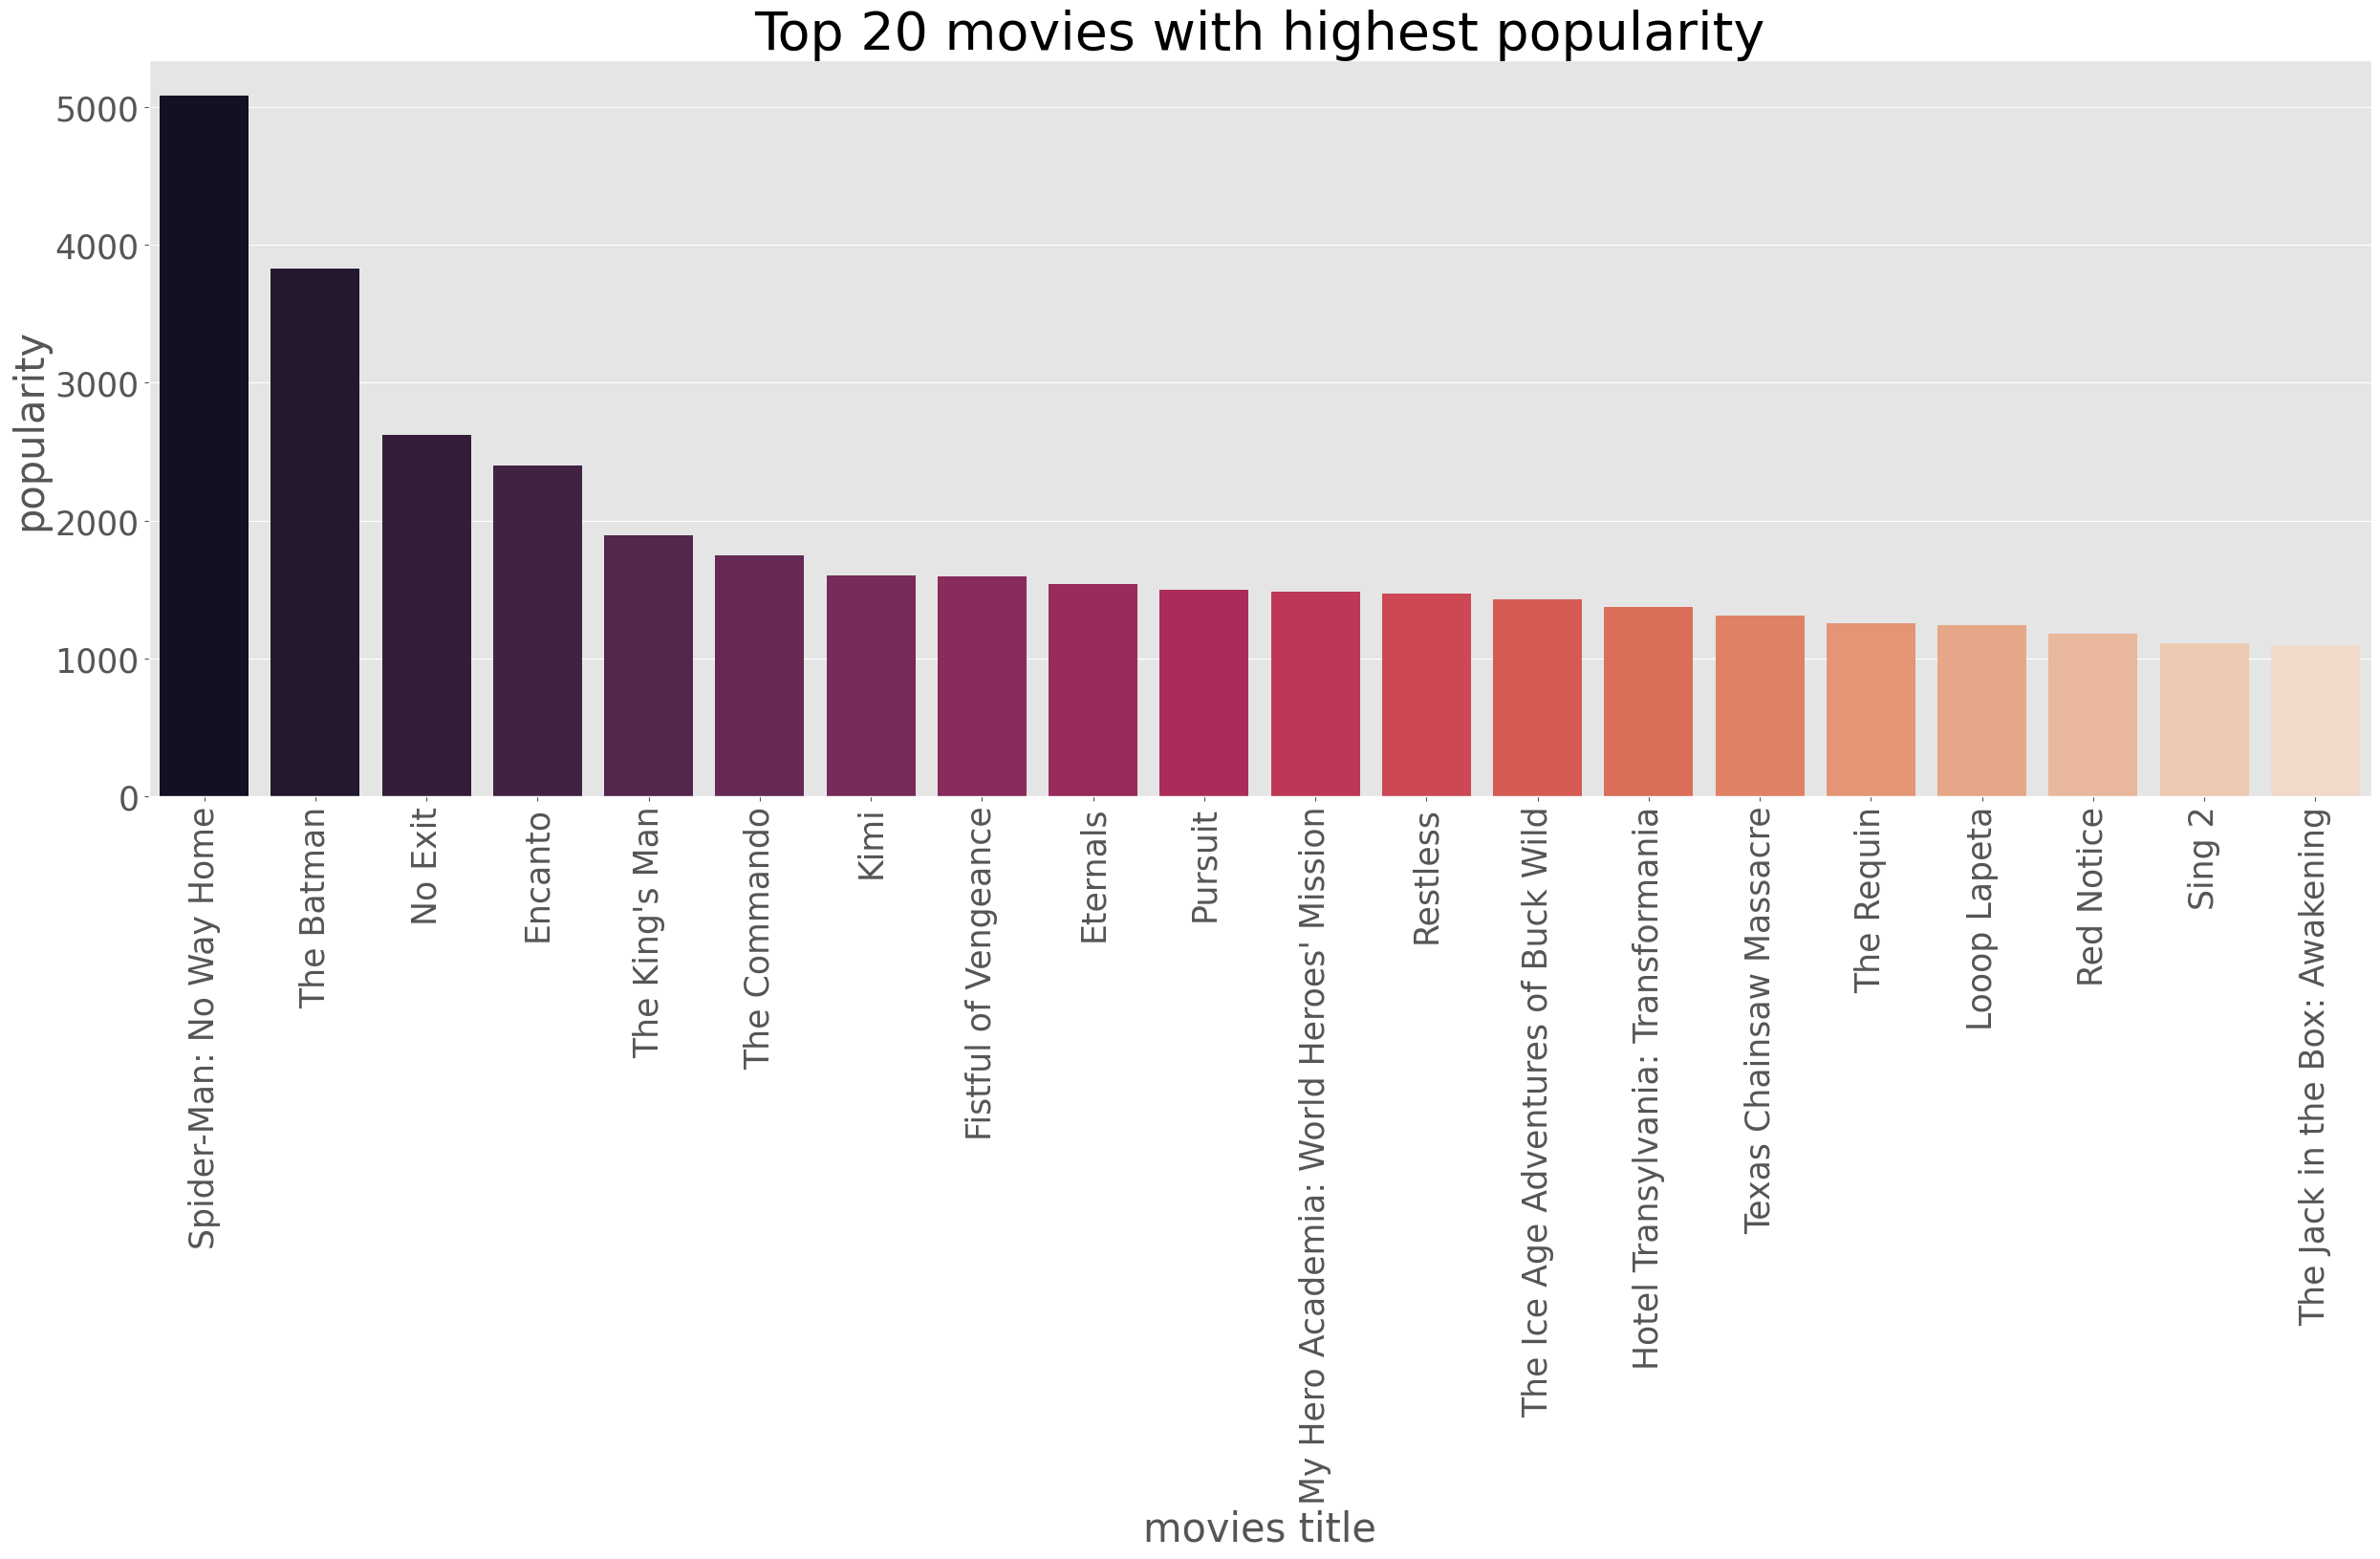

In [21]:
df2=df1[:20]

plt.figure(figsize=(30,10))
sns.barplot(x=df2.index,y=df2['Popularity'],palette='rocket' )

plt.title('Top 20 movies with highest popularity',fontsize=40)
plt.ylabel('popularity',fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)




The Top films are highly rated Are [Spider-Man: No Way Home,	The Batman,	No Exit ,....	]

In [22]:
df

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year_of_Release,Year_cat
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021,after 2010
1,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022,after 2010
2,No Exit,2618.087,122,6.3,en,Thriller,2022,after 2010
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021,after 2010
4,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021,after 2010
...,...,...,...,...,...,...,...,...
9822,Badlands,13.357,896,7.6,en,"Drama, Crime",1973,Before the nineties
9823,Violent Delights,13.356,8,3.5,es,Horror,2020,after 2010
9824,The Offering,13.355,94,5.0,en,"Mystery, Thriller, Horror",2016,after 2010
9825,The United States vs. Billie Holiday,13.354,152,6.7,en,"Music, Drama, History",2021,after 2010


# "Original_Language" Column

In [23]:
df['Original_Language'].value_counts()

Original_Language
en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: count, dtype: int64

Too many categories without any benefit !!! lets map them to "other" in one category

In [24]:
# Replace all values that are not 'en' with 'other'
df.loc[df['Original_Language'] != 'en', 'Original_Language'] = 'other'

# Replace 'en' with 'english'
df['Original_Language'] = df['Original_Language'].replace({'en': 'english'})


In [25]:
df['Original_Language'].value_counts()

Original_Language
english    7570
other      2257
Name: count, dtype: int64

<Axes: xlabel='Original_Language', ylabel='count'>

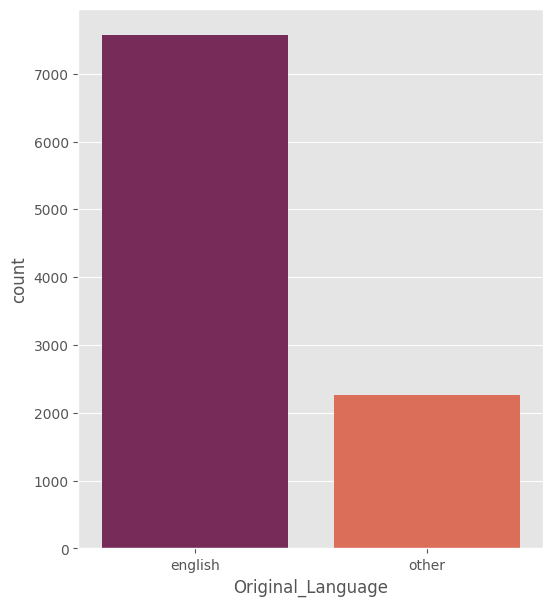

In [26]:
plt.figure(figsize=(6,7))
sns.countplot(x=df['Original_Language'],palette='rocket')

# "Genre" Column

In [27]:
df.sample(6)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year_of_Release,Year_cat
6345,Race to Witch Mountain,17.835,1387,5.8,english,"Adventure, Family, Fantasy, Science Fiction, T...",2009,Between 2000 and 2010
4917,The Nut Job,21.186,782,5.7,english,"Animation, Comedy, Family, Adventure",2014,after 2010
8133,"Ebirah, Horror of the Deep",15.069,120,6.3,other,"Science Fiction, Action, Fantasy",1966,Before the nineties
8047,In the Line of Fire,15.184,1164,7.0,english,"Action, Drama, Thriller, Crime, Mystery",1993,Between the nineties and the 2000s
4665,Bridesmaids,22.058,3739,6.5,english,"Comedy, Romance",2011,after 2010
6391,Monster High: 13 Wishes,17.758,105,7.3,other,"Family, Fantasy, Music, Animation",2013,after 2010


In [28]:
df.Genre.value_counts()

Genre
Drama                                            466
Comedy                                           403
Drama, Romance                                   248
Horror                                           238
Horror, Thriller                                 199
                                                ... 
Drama, Horror, Thriller, Science Fiction           1
Action, Science Fiction, Animation, Adventure      1
Comedy, Fantasy, Horror, Science Fiction           1
Drama, Science Fiction, Animation                  1
War, Drama, Science Fiction                        1
Name: count, Length: 2337, dtype: int64

In [29]:
from collections import Counter

Type_counter=Counter()
for i in range(len(df)):
    Type_counter.update(df.loc[i,'Genre'].split(', '))

Type_counter
                                                



Counter({'Drama': 3744,
         'Comedy': 3031,
         'Action': 2686,
         'Thriller': 2488,
         'Adventure': 1853,
         'Romance': 1476,
         'Horror': 1470,
         'Animation': 1439,
         'Family': 1414,
         'Fantasy': 1308,
         'Science Fiction': 1273,
         'Crime': 1242,
         'Mystery': 773,
         'History': 427,
         'War': 308,
         'Music': 295,
         'Documentary': 215,
         'TV Movie': 214,
         'Western': 137})

<Axes: xlabel='Count', ylabel='Type'>

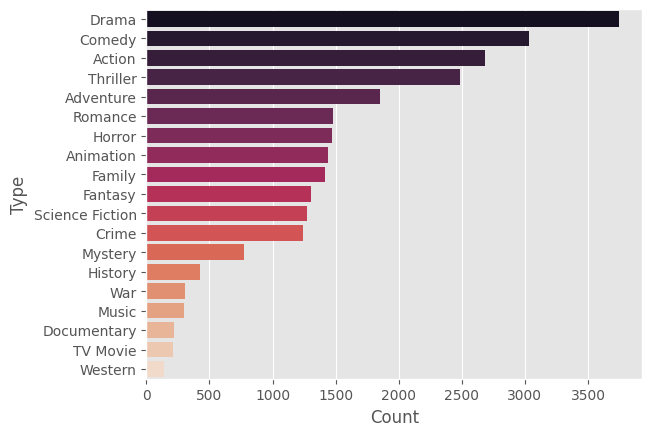

In [30]:
type_df = pd.DataFrame(list(Type_counter.items()), columns=['Type', 'Count'])

# Sorting the DataFrame by Count for plotting
type_df_sorted = type_df.sort_values('Count', ascending=False)

# Creating the bar plot
sns.barplot(y=type_df_sorted['Type'], x=type_df_sorted['Count'], palette='rocket')


Most of the films are genre ['Drama','Comedy','Action','Thriller', .......]

In [31]:
most_types=['Drama','Comedy','Action','Thriller']
 
def classify (genre):
    for i in range(len(most_types)):
        if most_types[i]==genre:
            return genre
        elif most_types[i] in genre:
            for j in range(i+1, len(most_types)):
                if most_types[j] in genre:
                    return f"{most_types[i]},{most_types[j]}" 
            return most_types[i]
    return "other"

for i in range(len(df)):
    df.loc[i,'Genre']=classify(df.loc[i,'Genre'])

In [32]:
df['Genre'].value_counts()

Genre
Comedy             1801
Drama              1798
other              1356
Action              938
Thriller            823
Drama,Comedy        701
Drama,Thriller      659
Action,Thriller     636
Drama,Action        586
Comedy,Action       485
Comedy,Thriller      44
Name: count, dtype: int64

Text(0.5, 1.0, 'Genre Counts')

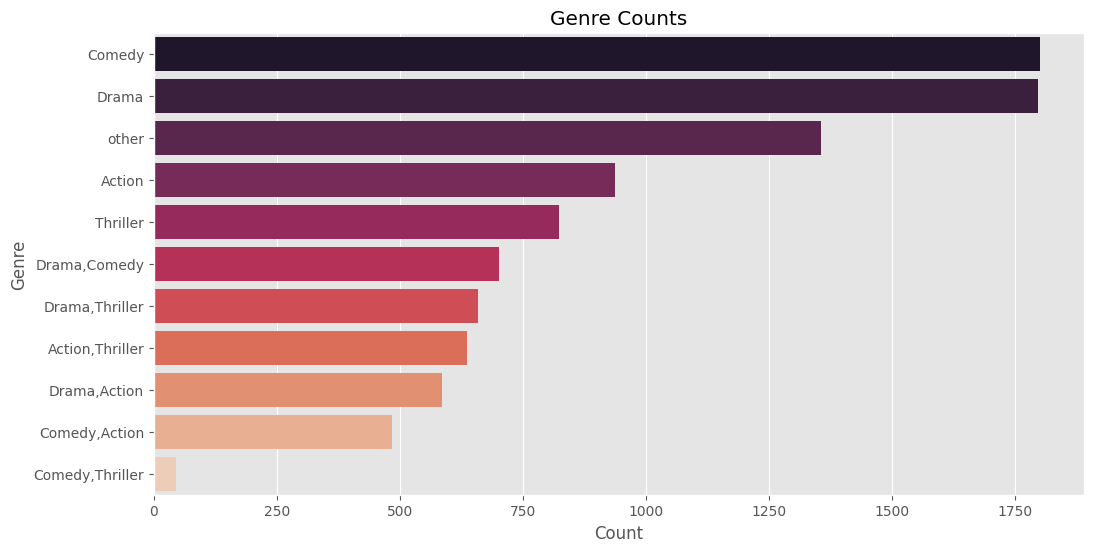

In [33]:
genre_counts = df['Genre'].value_counts().reset_index()

# Sorting the DataFrame by Count
genre_counts = genre_counts.sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=genre_counts['Genre'], x=genre_counts['count'], palette='rocket')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Counts')


# "Vote_Average" Column

<Axes: xlabel='Vote_Average', ylabel='Density'>

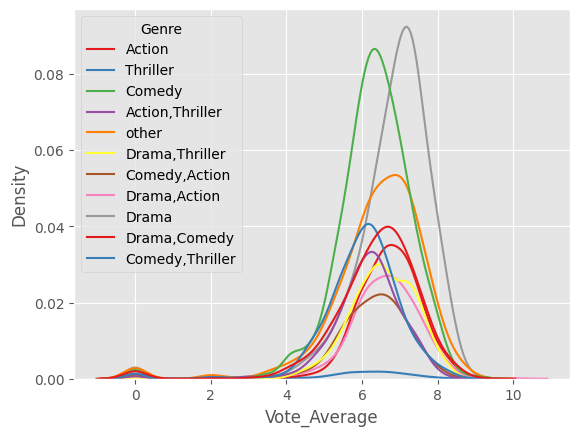

In [34]:
sns.kdeplot(x='Vote_Average',data=df,palette='Set1',hue='Genre')

films that have high vote are ["Drama", "Comedy", .......]

In [35]:
mod_data = df.groupby(['Title'])[[ 'Vote_Average']].mean()
mod_data = mod_data.sort_values(by = 'Vote_Average', ascending = False)
mod_data

,Vote_Average
Title,
Kung Fu Master Huo Yuanjia,10.0
Franco Escamilla: Por La Anécdota,9.2
Impossible Things,9.1
Demon Slayer: Kimetsu no Yaiba Sibling's Bond,9.1
My Sex Doll,9.0
...,...
After Ever Happy,0.0
Jurassic World Dominion,0.0
Crows Are White,0.0


In [36]:
print(f"{df.loc[df['Title'] == "Kung Fu Master Huo Yuanjia" ,"Genre"]}")
print(f"{df.loc[df['Title'] == "Franco Escamilla: Por La Anécdota" ,"Genre"]}")

9391    Drama,Action
Name: Genre, dtype: object
7339    Comedy
Name: Genre, dtype: object


the most highly rated film is ["Kung Fu Master Huo Yuanjia", "Franco Escamilla: Por La Anécdota	"]